In [1]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("mice", "cohort3")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")



[2023-11-10 12:59:53,382][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-11-10 12:59:53,568][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# ANIMALS
ANIMAL_IDS = ["R621", "R622", "R623", "R624"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
# date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=1)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [3]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 20 sessions for R621 between 2023-10-21 and 2023-11-09
fetched 20 sessions for R622 between 2023-10-21 and 2023-11-09
fetched 20 sessions for R623 between 2023-10-21 and 2023-11-09
fetched 20 sessions for R624 between 2023-10-21 and 2023-11-09


In [4]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )

f_name = "R62s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)

days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-10-21 -> 2023-11-01
Returning appended df with entries between 2023-10-21 and 2023-11-09
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R62s_days_df.csv


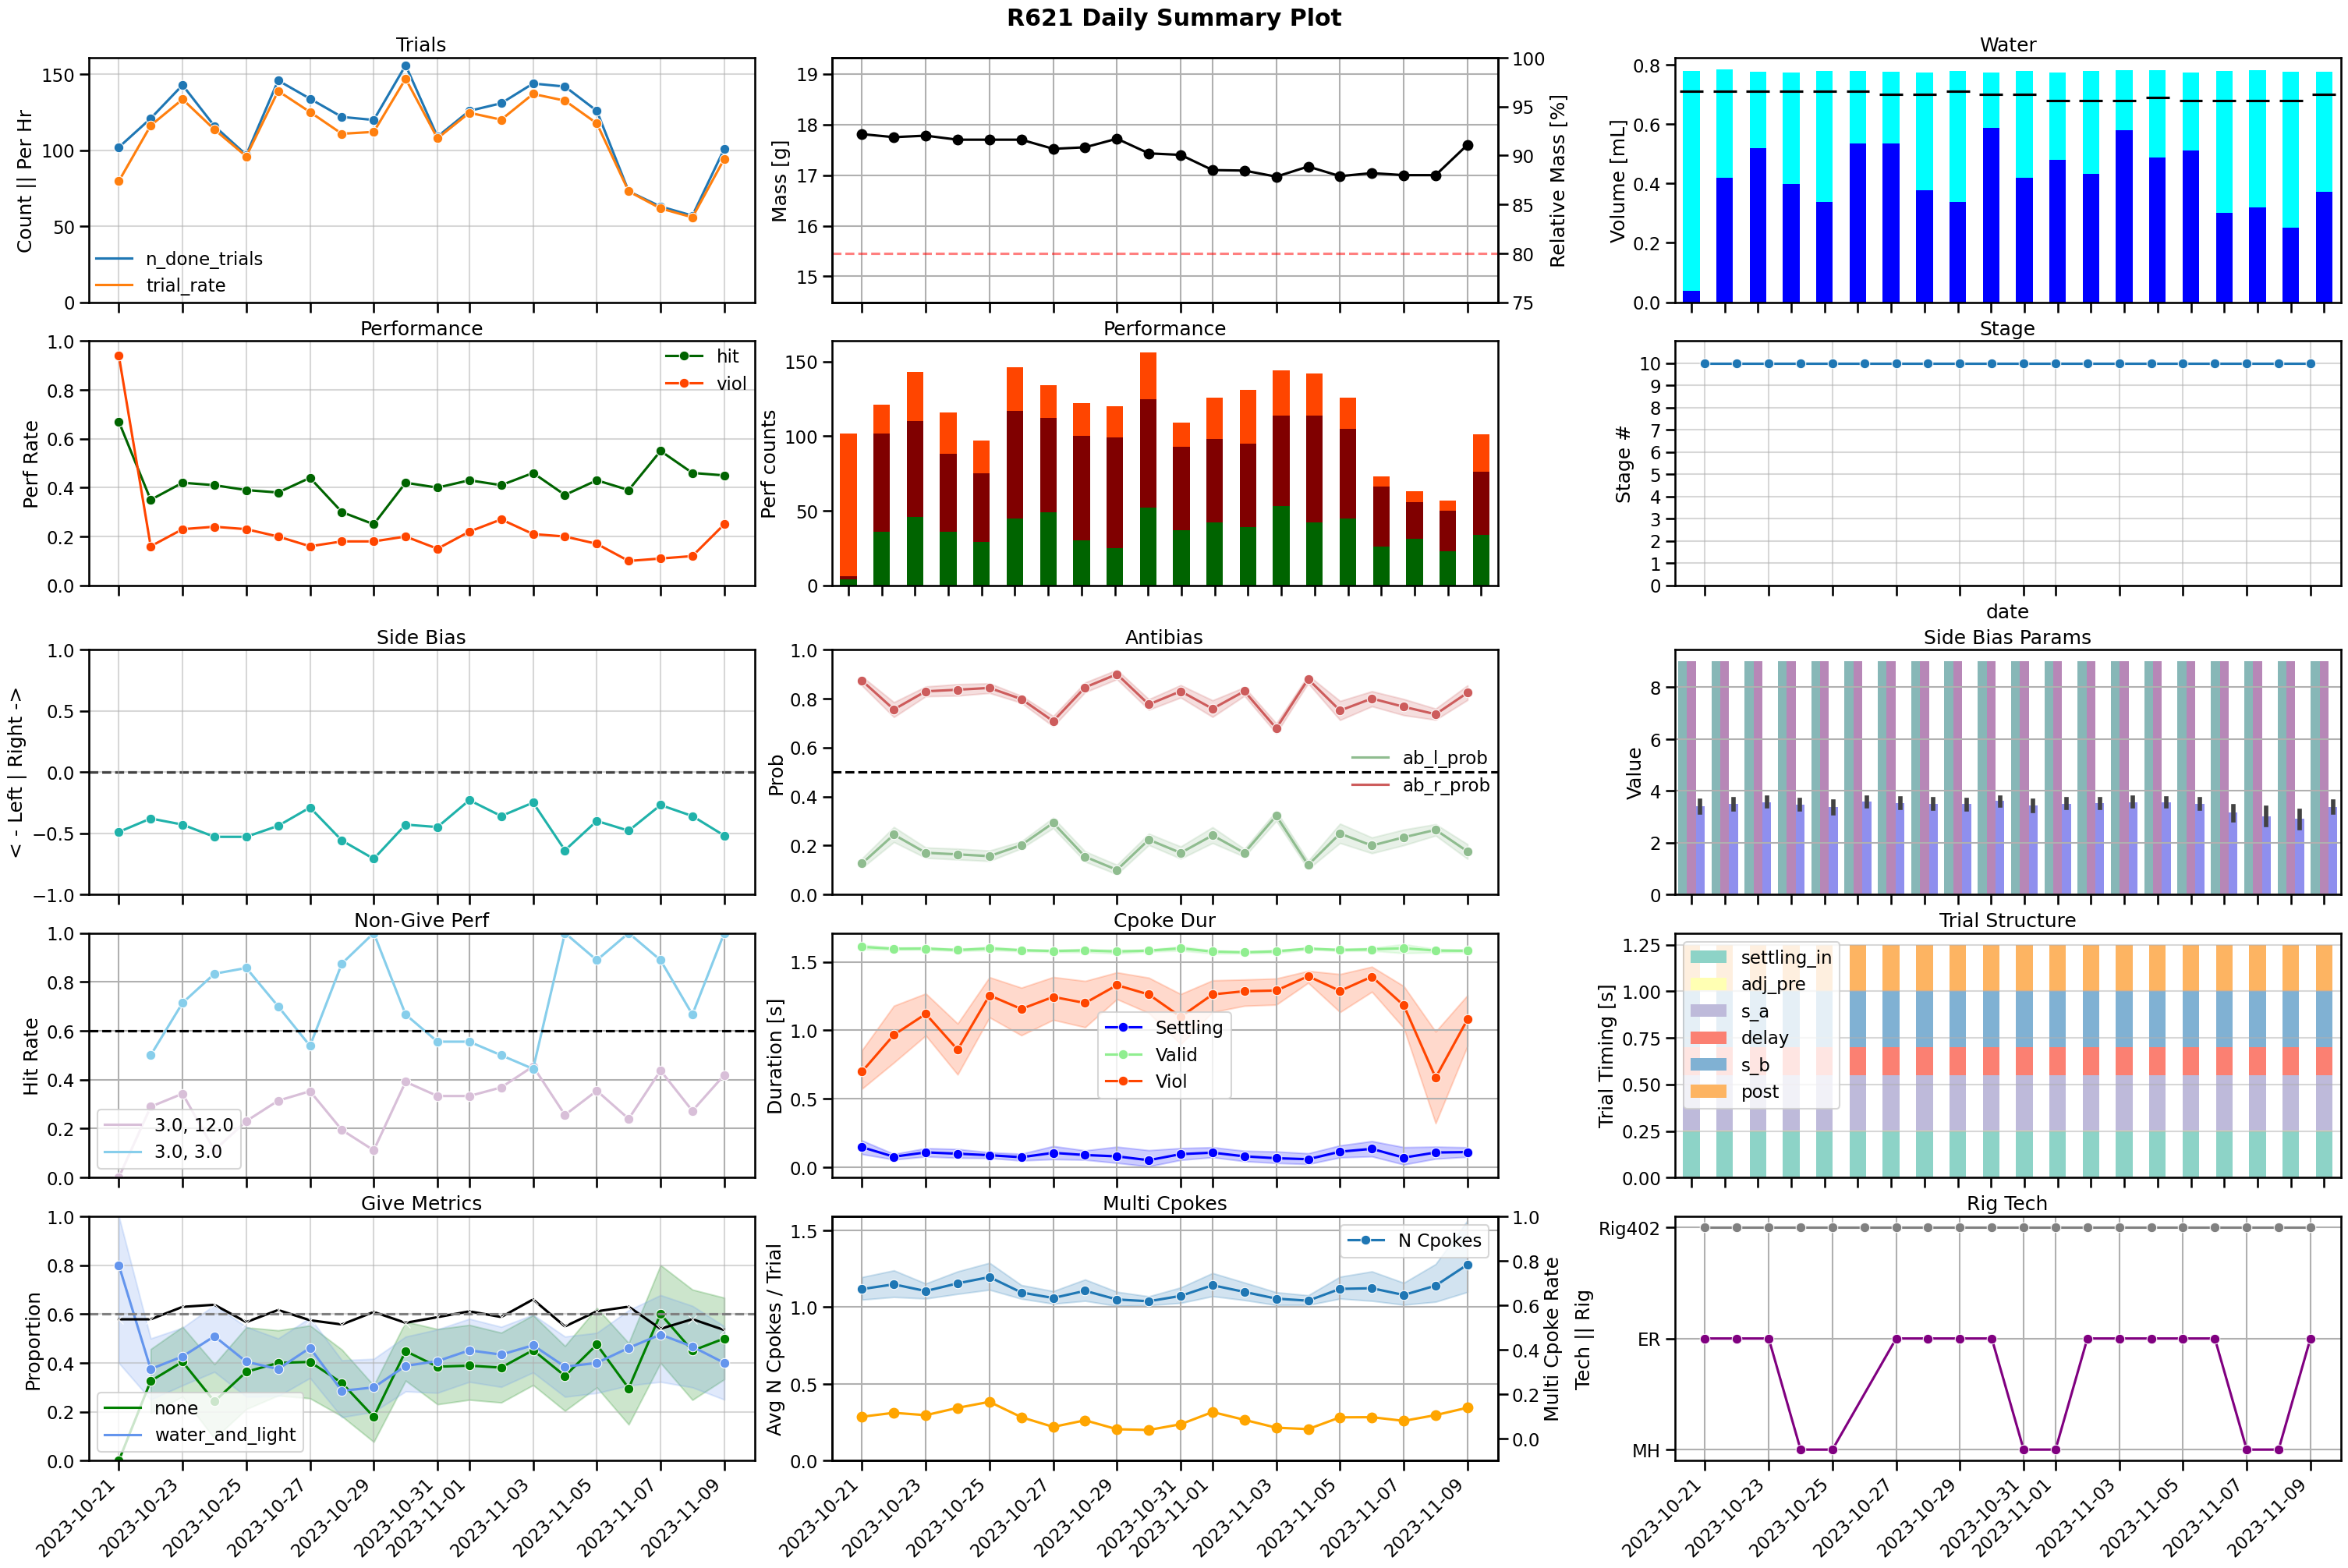

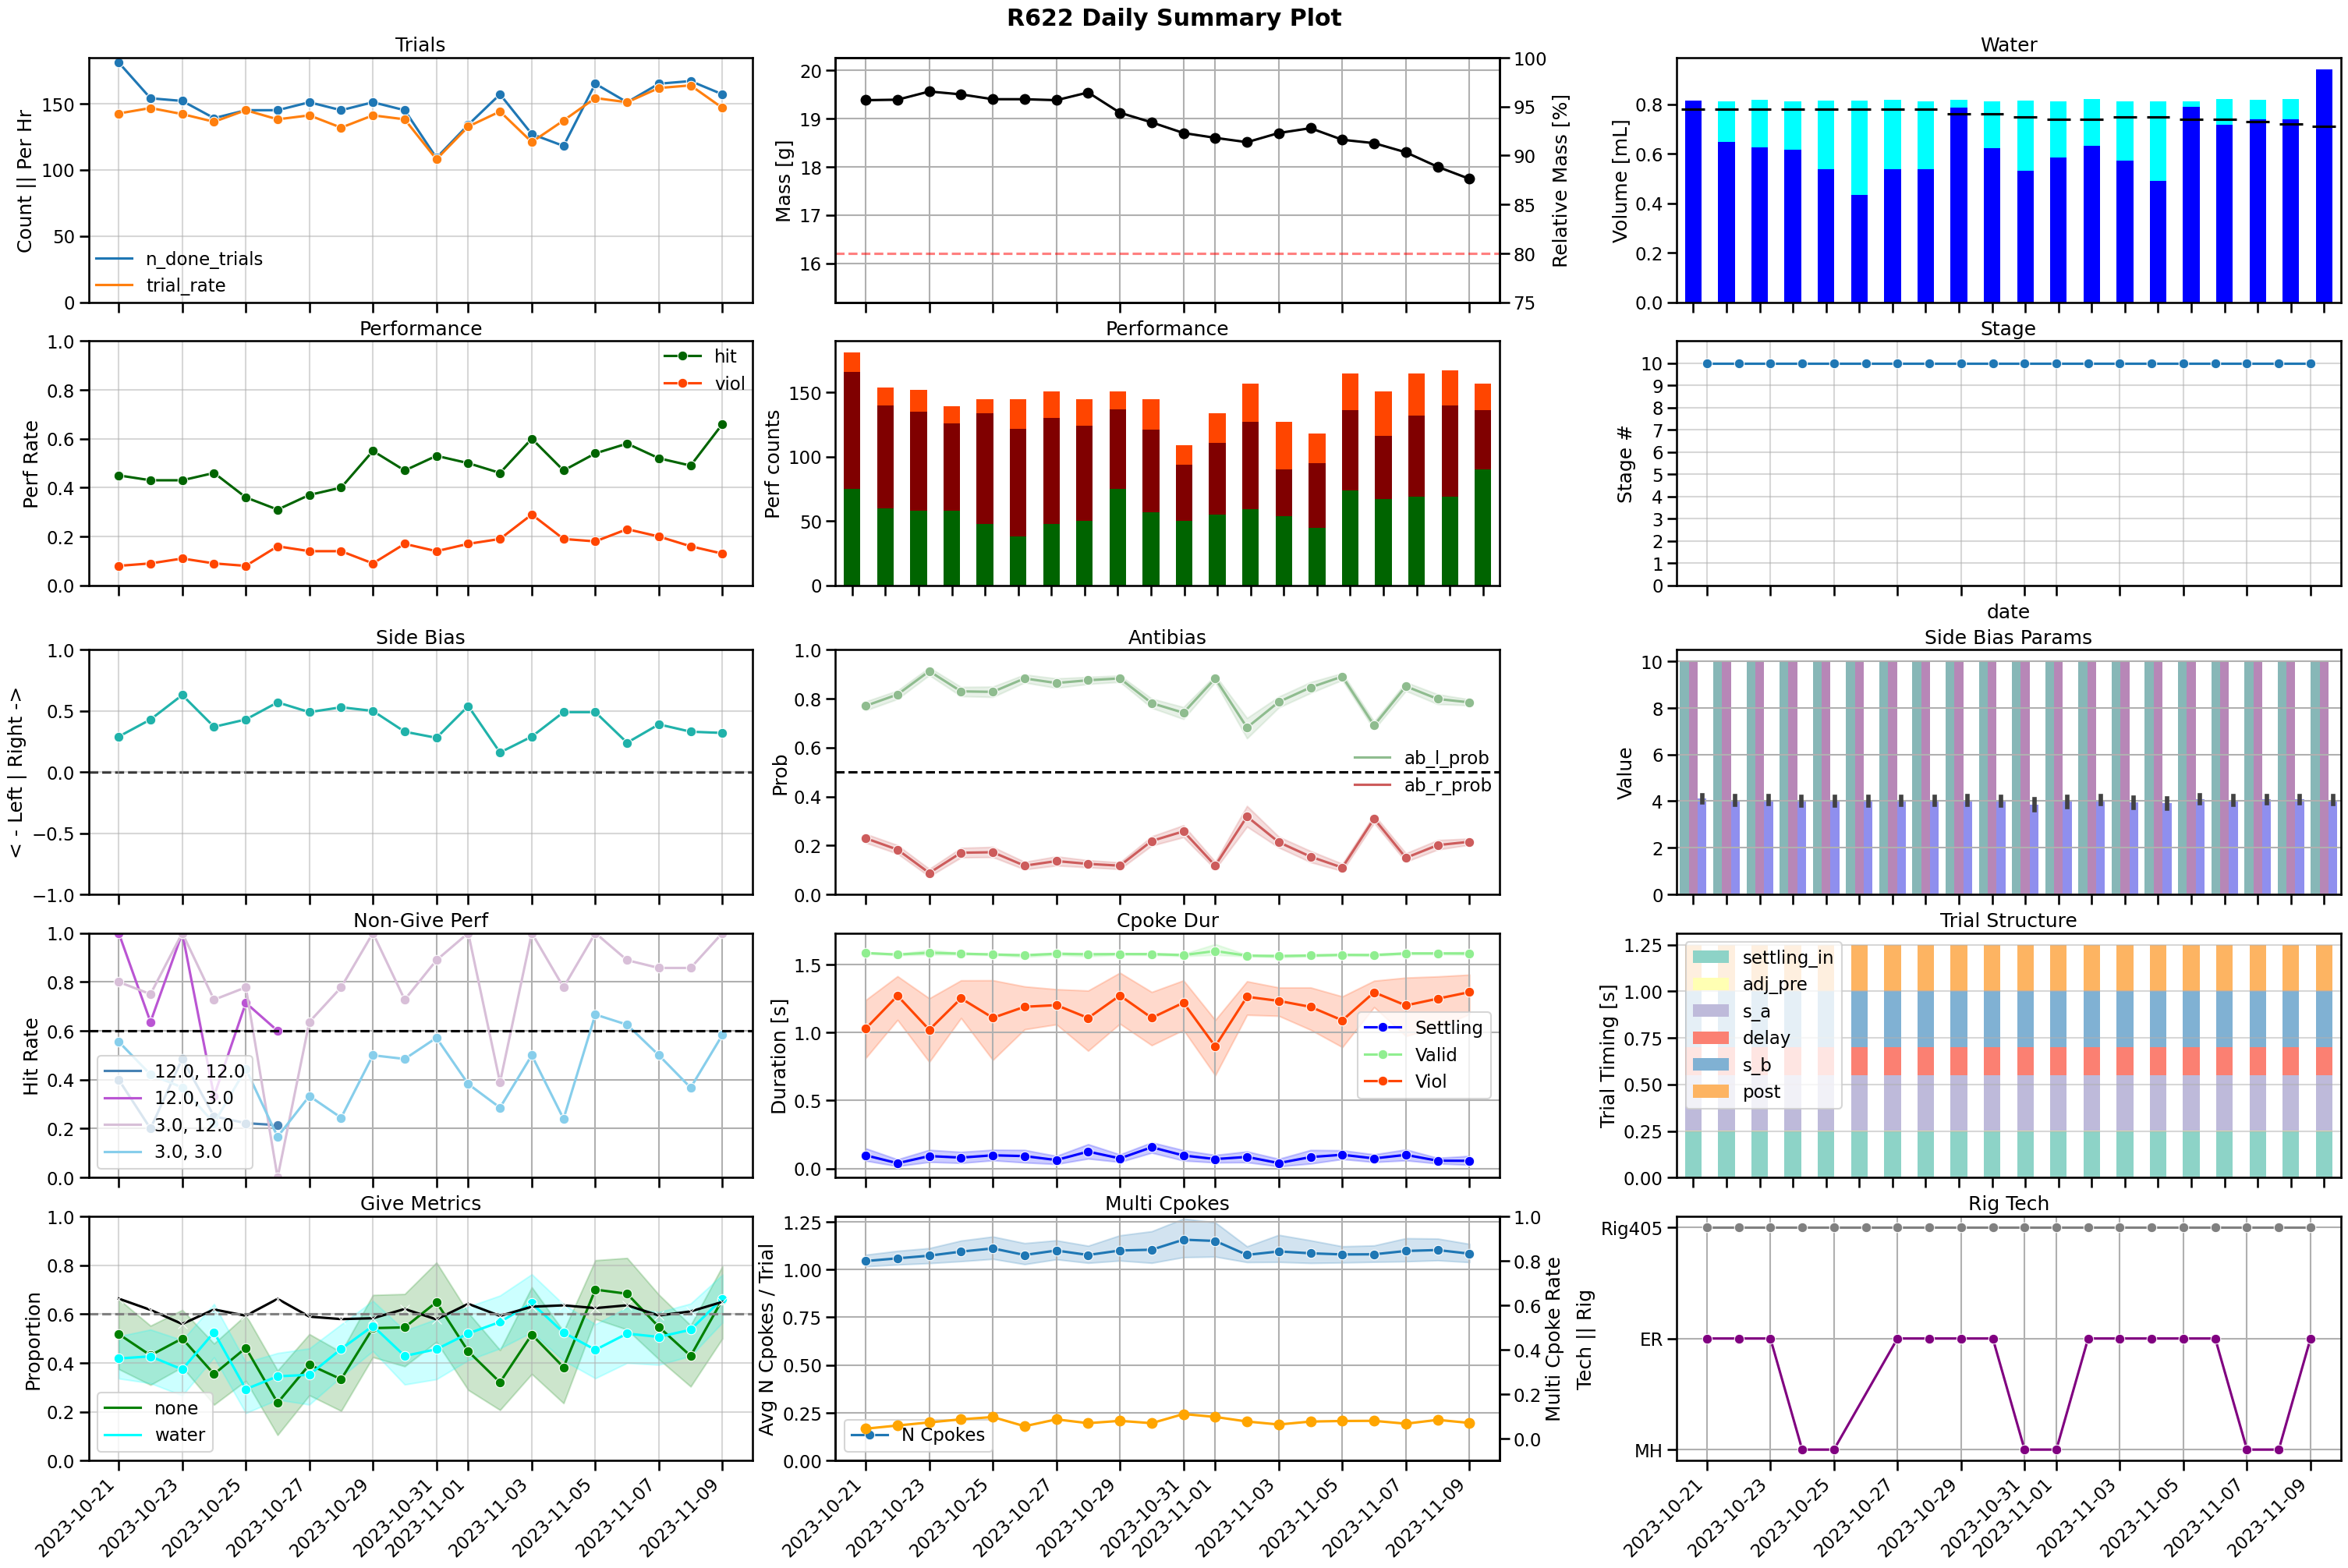

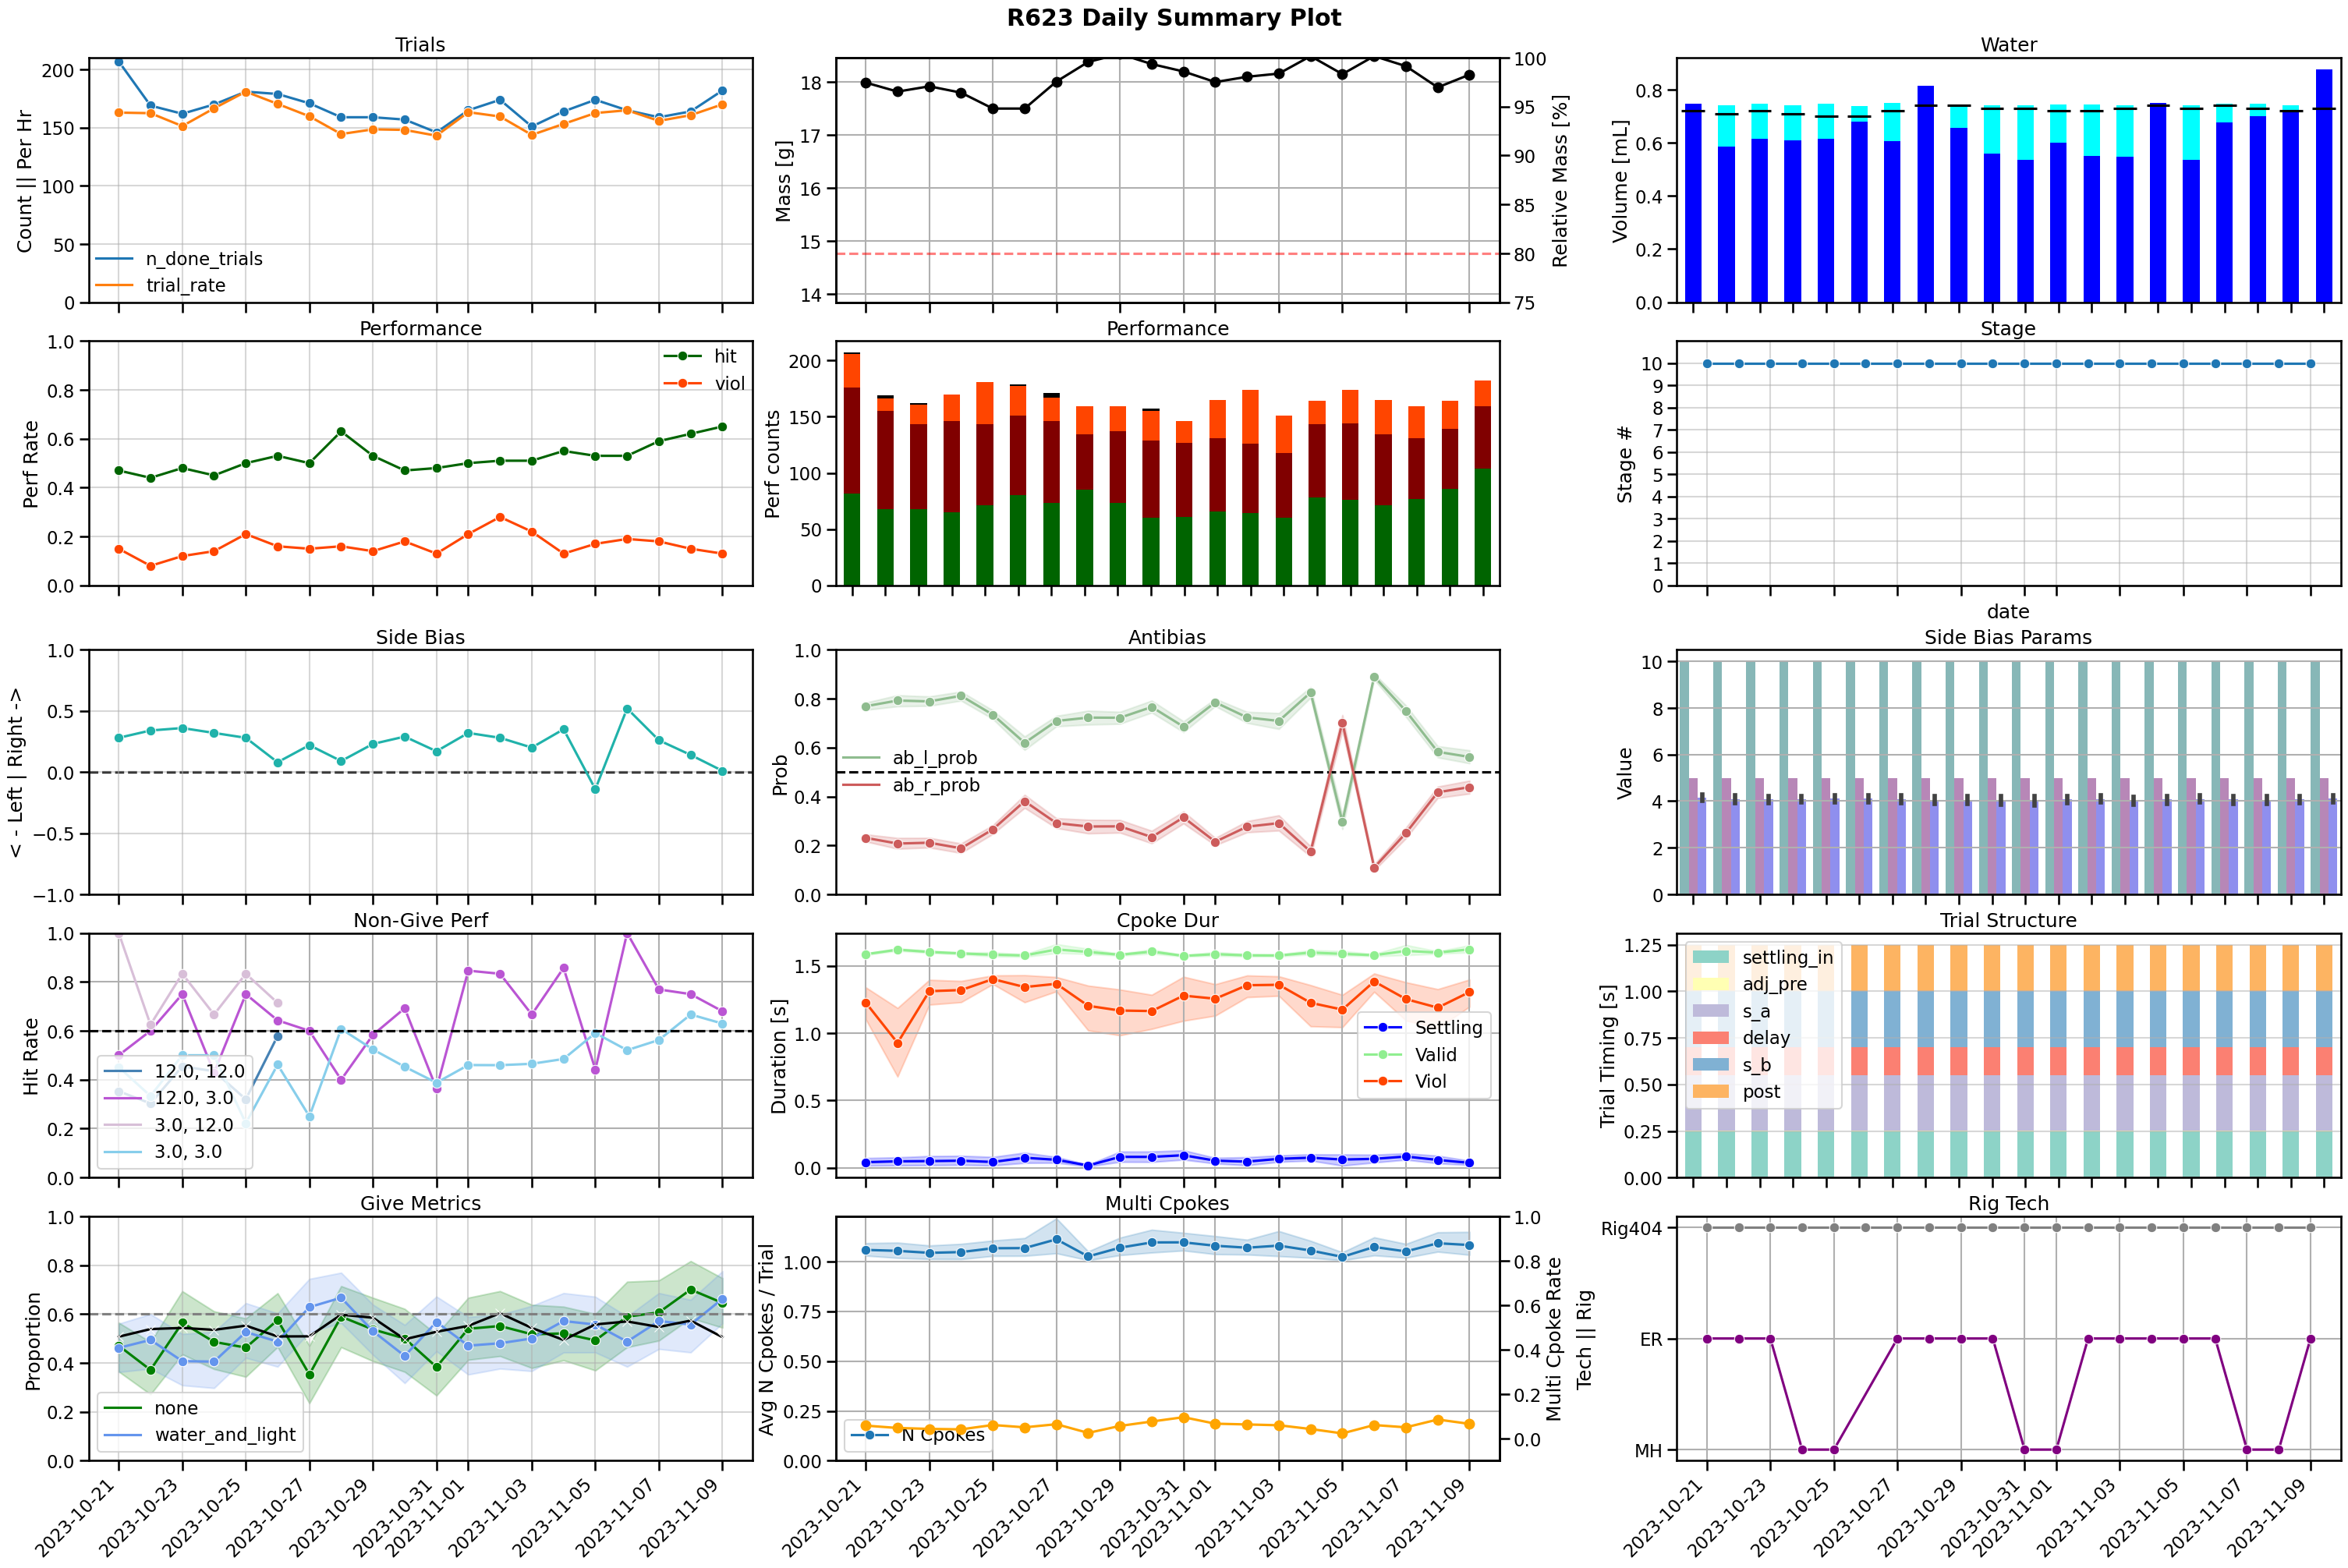

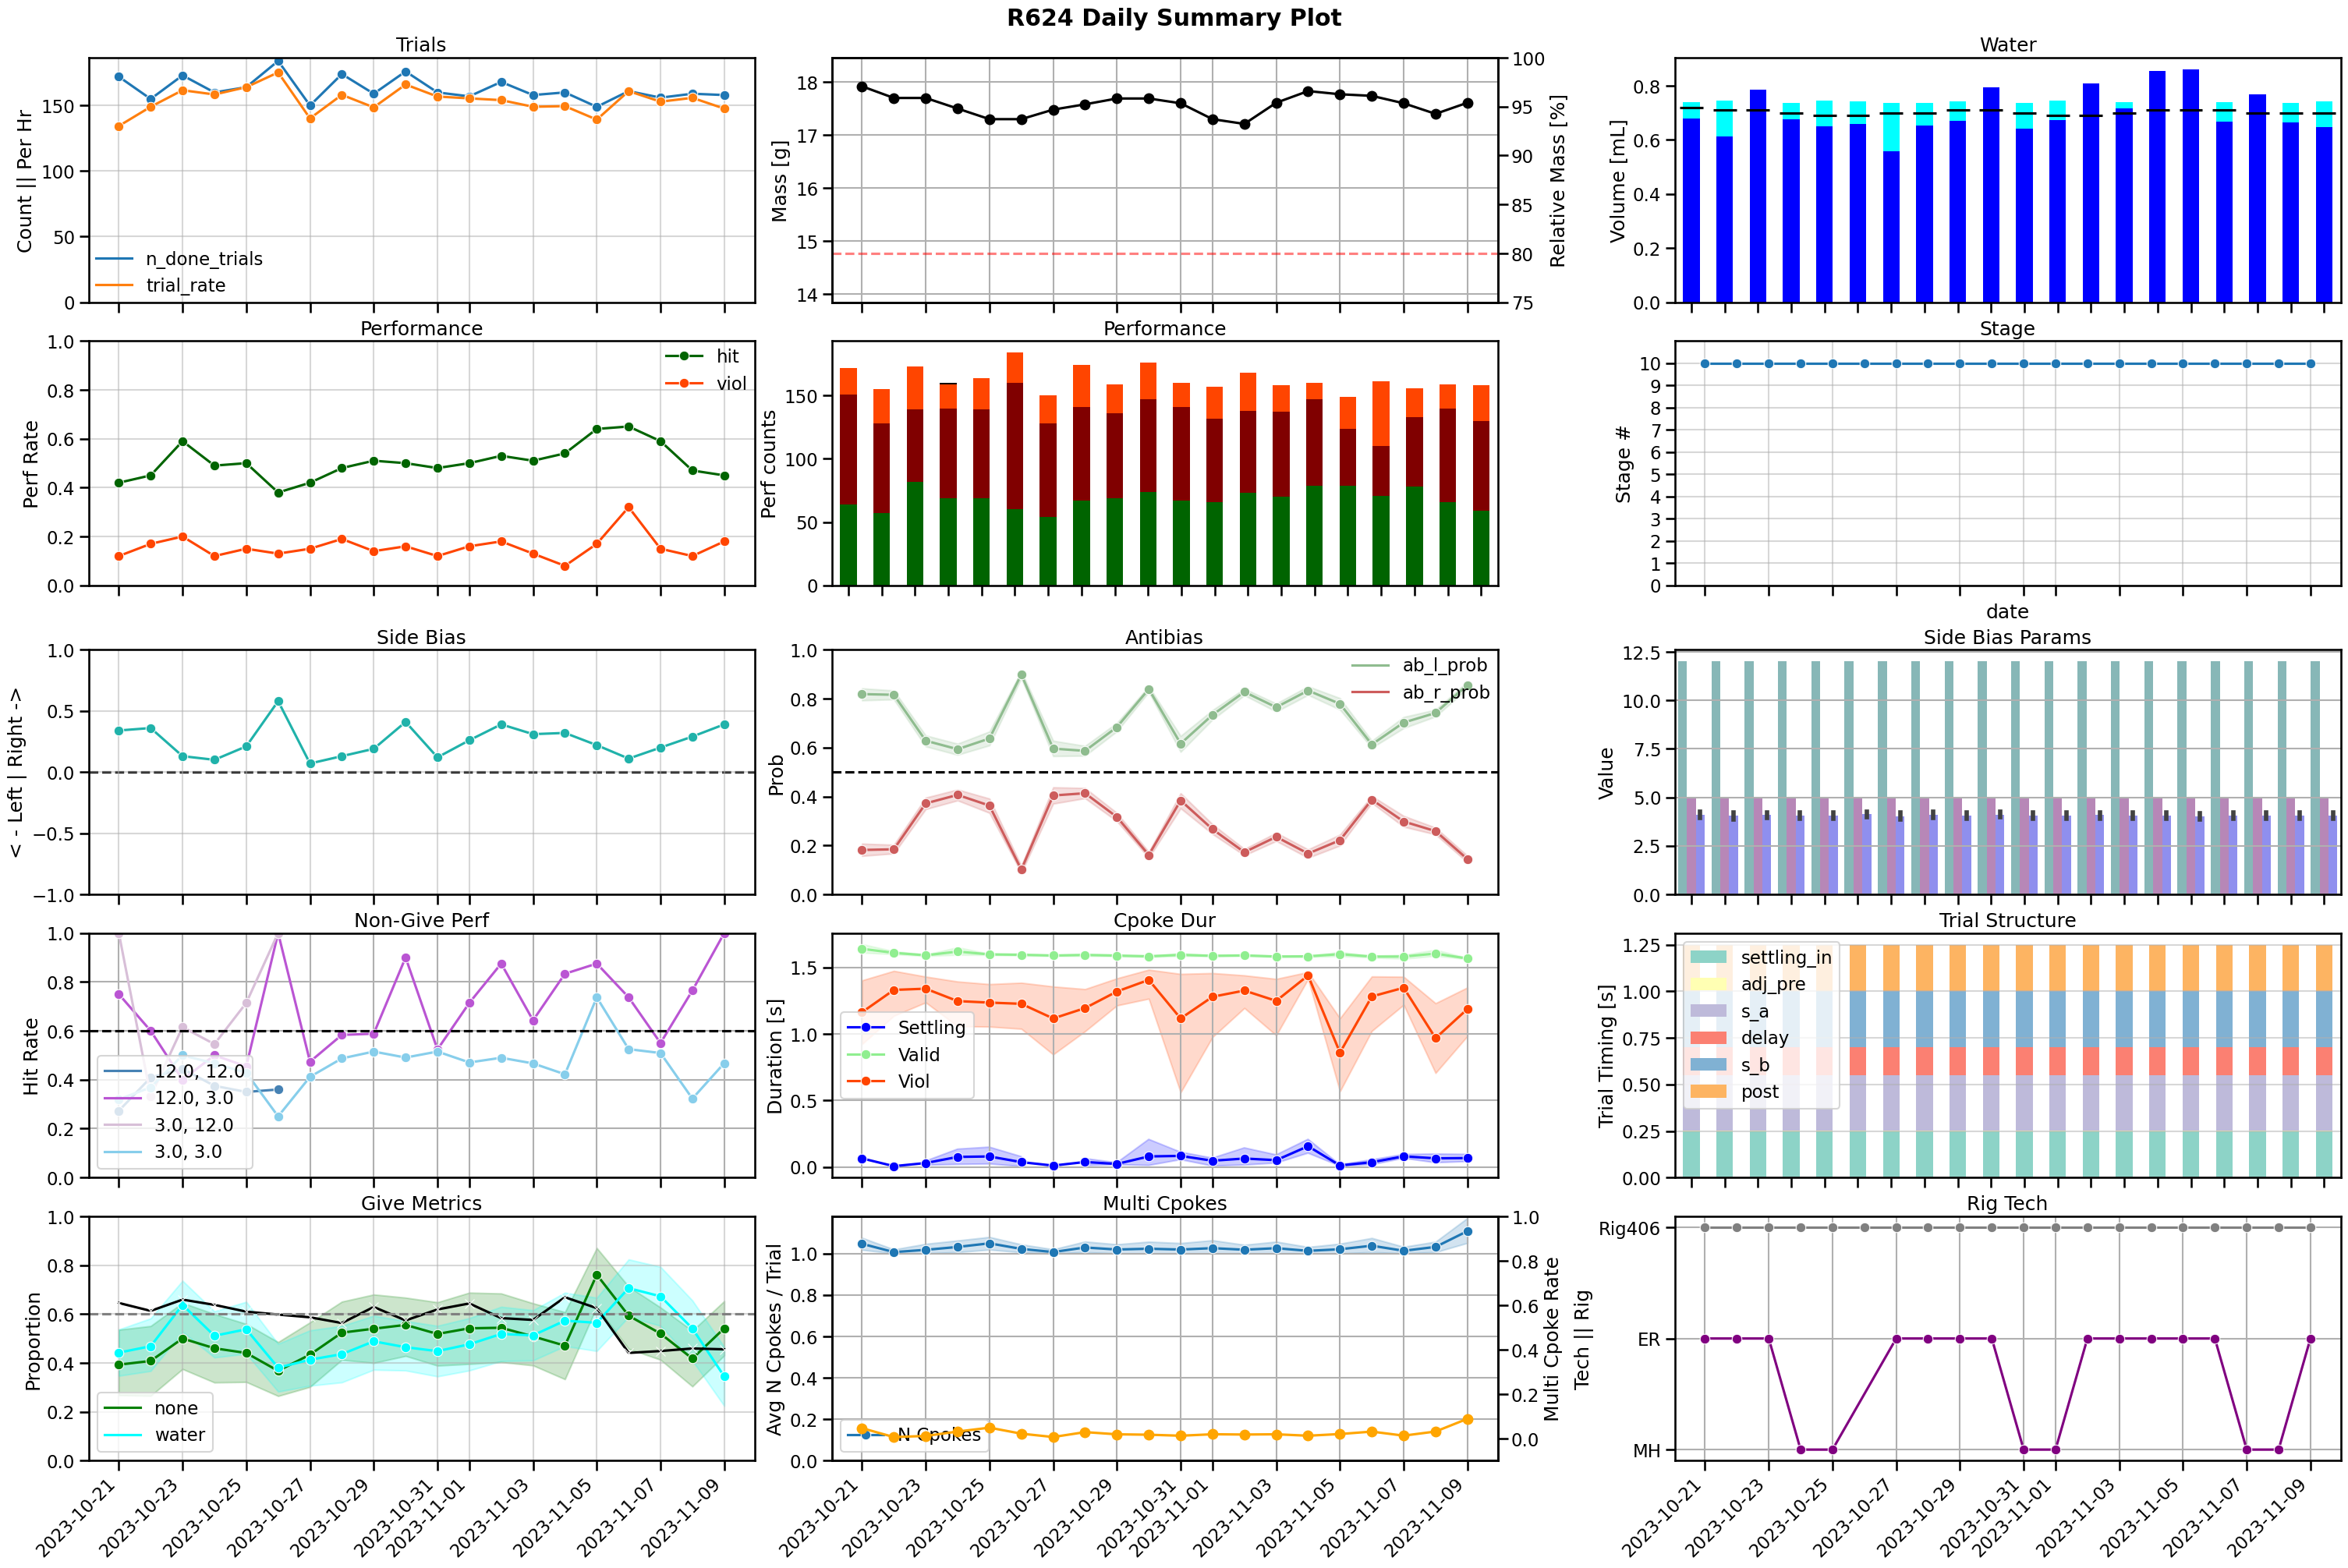

In [5]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [6]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R621_2023-11-01_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R622_2023-11-01_day_summary
['s_a', 's_b', 'post', 'go']
making R623_2023-11-01_day_summary
['s_a', 's_b', 'post', 'go']
making R624_2023-11-01_day_summary
['s_a', 'go']
making R621_2023-11-02_day_summary
['s_a', 's_b', 'post', 'go']
making R622_2023-11-02_day_summary
['s_a', 's_b', 'post', 'go']
making R623_2023-11-02_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R624_2023-11-02_day_summary
['s_b', 'go']
making R621_2023-11-03_day_summary
['s_a', 's_b', 'post', 'go']
making R622_2023-11-03_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R623_2023-11-03_day_summary
['s_a', 's_b', 'post', 'go']
making R624_2023-11-03_day_summary
['s_a', 'post', 'go']
making R621_2023-11-04_day_summary
['post', 'go']
making R622_2023-11-04_day_summary
['s_a', 'delay', 'post', 'go']
making R623_2023-11-04_day_summary
['s_a', 's_b', 'post', 'go']
making R624_2023-11-04_day_summary
['go']
making R621_2023-11-